In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [5]:
autoencoder = models.Sequential()
# 16 * (3 * 3 * 1) + 16 = 160
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2))
# 8 * (3 * 3 * 16) + 8 = 1160
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2))
# 나중에 UpSampling()하여 28x28을 만드려고 의도적으로 strides=2를 주어 4x4를 만듦
autoencoder.add(layers.Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [6]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 102s 208ms/step - loss: 0.0429 - val_loss: 5.8722
Epoch 2/50
469/469 [==============================] - 72s 153ms/step - loss: 0.0040 - val_loss: 5.6333
Epoch 3/50
469/469 [==============================] - 64s 137ms/step - loss: 0.0040 - val_loss: 5.7401
Epoch 4/50
469/469 [==============================] - 69s 148ms/step - loss: 0.0040 - val_loss: 6.9610
Epoch 5/50
469/469 [==============================] - 90s 191ms/step - loss: 0.0039 - val_loss: 9.2812
Epoch 6/50
469/469 [==============================] - 566s 1s/step - loss: 0.0039 - val_loss: 13.2623
Epoch 7/50
469/469 [==============================] - 115s 245ms/step - loss: 0.0038 - val_loss: 14.4212
Epoch 8/50
469/469 [==============================] - 98s 208ms/step - loss: 0.0038 - val_loss: 13.5336
Epoch 9/50
469/469 [==============================] - 88s 187ms/step - loss: 0.0038 - val_loss: 13.9187
Epoch 10/50
469/469 [==============================] - 89s 189ms/step

313/313 [==============================] - 1s 2ms/step


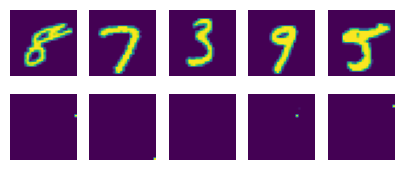

In [9]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
    
plt.show()